<a href="https://colab.research.google.com/github/sanMil2003/APRENDIZAJE_AUTOMATICO_23_24/blob/main/pruebaZalando_jipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño y entrenamiento de un sistema de redes de neuronas artificiales**

En esta práctica, utilizaremos la biblioteca Python Keras para entrenar un modelo de Red de Neuronas Artificiales a reconocer y clasificar imágenes de ropa.

Antes de cargar el conjunto de imágenes que se emplearán, nos aseguramos de estar ejecutando la versión 2.0.0 (o superior) de TensorFlow y se importan las librerias que van a ser requeridas.

In [ ]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.initializers import HeNormal, GlorotUniform, RandomNormal
from keras.utils import to_categorical

print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.13.0


**Cargamos el conjunto de datos FASHION MNIST en Keras**

El conjunto de datos FASHION MNIST se trata de 70K imágenes en escala de grises de prendas individuales de ropa y zapatos, etiquetadas con el nombre de lo que representa. Estas prendas estan clasificadas en 10 categorias (entre 0 y 9), cada una representando lo siguiente:


*   0 = T-shirt / top
*   1 = Trouser
*   2 = Pullover
*   3 = Dress
*   4 = Coat
*   5 = Sandal
*   6 = Shirt
*   7 = Sneaker
*   8 = Bag
*   9 = Ankle boot

El modelo se entrenara mediante **aprendizaje automatico supervisado**. De las 70k imágenes, 60k se usarán para entrenamiento. El modelo predecirá para cada imagen la probabilidad de pertenecer a una clase y, posteriormente, lo comparara con su **etiqueta** para ver si ha acertado. Este metodo se conoce como **retropropagacion del gradiente** y permite que la informacion del costo fluya hacia atras a traves de la red para calcular el gradiente. Una vez que se ha aplicado un **patron** a la entrada de la red como **estimulo**, este se propaga desde la primera capa a traves de las capas siguientes de la red, hasta generar una salida. La señal de salida se compara con la señal deseada y se calcula una señal de error para cada una de las salidas. Las salidas de error entonces se propagan hacia atras, partiendo de la capa de salida, hacia todas las neuronas de la capa oculta que contribuyen directamente a la salida. Sin embargo las neuronas de la capa oculta solo reciben una fraccion de la señal total del error, basandose aproximadamente en la contribucion relativa que haya aportado cada neurona a la salida original. Este proceso se repite capa por capa, hasta que todas las neuronas de la red hayan recibidio una **señal de error** que describa su contribucion relativa al error total.

La importancia de este proceso consiste en que, a medida que se entrena la red, las **neuronas de las capas intermedias se organizan** a si mismas de tal modo que las distintas neuronas aprenden a reconocer distintas caracteristicas del espacio total de entrada. Despues del entrenamiento, cuando se les presente un patron arbitrario de entrada que contenga ruido o que este incompleto, las neuronas de la capa oculta de la red responderan con una salida activa si la nueva entrada contiene un patron que se asemeje a aquella caracteistica que las neuronas individuales hayan aprendido a reconcoer durante su entrenamiento.



Por lo tanto, para formar el conjunto de imagenes de entrenmaiento y de prueba, se crean dos **tuplas**:
* Una tupla con las imagenes y etiquetas de las imagenes de entrenamiento
* Otra tupla igual con las imagenes de prueba

In [ ]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
x_train = train_images
x_test = test_images
y_train = train_labels
y_test = test_labels

4422102/4422102 [==============================] - 0s 0us/step


A continuacion, **comprobamos como se han cargado los datos de entrenamiento**:

Vemos que hay 60,000 imágenes en el conjunto de entrenamiento y que en cuanto a sus dimensiones, cada imagen viene representada por una matriz de 28x28 píxeles. Cada imagen del conjunto de datos MNIST se representa como una matriz bidimensional donde cada pixel de la imgen es un valor numerico que representa la intensidad del color (escala de grises).

El resto de imagenes se han guardado en las de prueba. Con este conjunto de datos, el modelo ya **no aprende**. Simplemente **predice** a partir de la red ya entrenada.

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Representamos la matriz de la imagen 17
Para mostrar la **matriz** de forma más **legible**, se hace lo siguiente:

*    Se controla la cantidad de decimales que se muestran cuando se imprimen números reales, en este caso 2 decimales (precision=2)
*    Se suprime la notación científica (suppress=True)
* Se ajusta el ancho de línea máximo a 145 caracteres (linewidth=145)

In [ ]:
# Vemos la matriz de la imagen número 17 (28x28)

np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[17]))

# La imagen anterior corresponde con una camiseta. Hasta se puede intuir....
train_labels[17]

[[  0   0   0   0   0   0   0   0   0   0   0  19   4   0   0   0   0   0   0   0   0   1   2   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1  72 157 222 244 252 148 198 200 241 201  46   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0  31 200 211 226 224 205 211 242 212 246 245 194 207 212 220 120   0   0   1   0   0   0]
 [  0   0   0   0   0   0 190 217 200 200 198 196 189 178 198 179 164 179 182 183 182 193 196   0   0   0   0   0]
 [  0   0   0   0   0 101 212 196 200 198 198 197 194 187 189 190 186 189 186 183 174 161 175  83   0   0   0   0]
 [  0   0   0   0   0 205 213 200 200 193 194 194 193 189 189 186 189 183 179 171 176 163 171 175   0   0   0   0]
 [  0   0   0   0   0 205 216 205 212 190 191 189 189 187 186 185 185 182 183 180 172 154 164 196  26   0   0   0]
 [  0   0   0   0 157 215 226 244 231 189 183 189 187 186 183 183 183 179 182 180 167 178 198 185  89   0   0   0]
 [  0   0   0   0  49 227 220 254 250 200 185 186 185 185 182 180 182 174 168 16

0

Ahora pintemos la camiseta

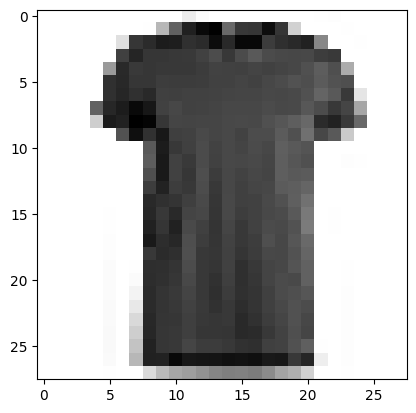

In [ ]:
# Veamos el elemento 17 y pintémoslo con matplotlib
digit = train_images[17]  # Esta variable ahora contiene la matriz numérica que representa la imagen numero 17

# cmap=plt.cm.binary se utiliza para representar la imagen en blanco y negro (escala de grises),
# invierte la escala de colores predeterminada para que los píxeles oscuros aparezcan en blanco y los píxeles claros aparezcan en negro.
# Es decir, los valores más bajos en la matriz aparecerán en blanco y los valores más altos aparecerán en negro.
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Comprobamos que los datos de prueba tienen las dimensiones esperadas (28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

Mostremos otra imagen

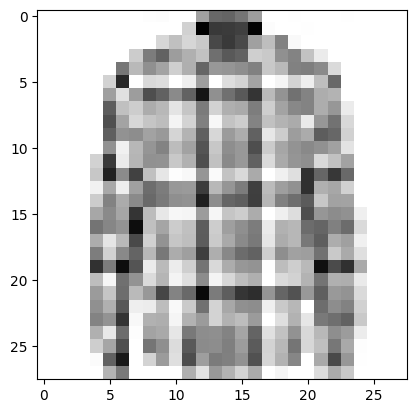

2

In [ ]:
# Veamos el elemento 7 de test y pintémoslo con matplotlib
digit = test_images[7]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


# La imagen anterior corresponde con una camisa. Hasta se puede intuir....
train_labels[7]

# **Arquitectura de la red neuronal**

Una vez procesados los datos, comenzamos a crear la red.

A la hora de construir la red, se nos pide crear **8 modelos** distintos combinando diferentes tipos de la funcion de activacion, optimizador y numero de neuronas en las capas ocultas. El número de neuronas no se puede modificar en la ultima capa, pues esto no es algo que nosotros podamos decidir, sino que lo decide el algoritmo segun el problema.

Lo primero que hacemos es crear un **modelo sequencial** al que llamaremos Zalando. En dicho modelo, crearemos la capa de entrada, la capa oculta y la capa de salida. En la capa de entrada, se emplea la funcion **flatten** de keras para convertir los imagenes multidimensionales en una unica dimesion. De esta forma, para cada imagen, en vez de tener una matriz de 28x28 tendremos un vector unidimensional de 784 elementos. Esta funcion es importante, pues las capas densas requieren que la entrada de los datos sean unidimensionales.

A la capa de salida, se le pasa la funcion de activacion **softmax** (funcion de probablidad) de 10 neuronas. Como resultado, devolverá una matriz con 10 valores que sumaran en total 1, representando cada posicion la probabilidad de que la imagen pertenezca a cada una de nuestras clases definidas. Ademas, la probabilidad de que una imagen sea una prenda u otra reside en los pesos.

A continuacion, se le aplica a la **funcion de error** un modelo de **optimizacion**. De esta forma se minimiza la funcion de error para encontrar los puntos donde la derivada sea cero, es decir, que se encuentre un minimo o maximo. Por eso se quiere hallar el minimo, pues es el momento en el cual el error es menor y el sistema ha aprendido.

ZalandoX es una lista donde se guardan los 8 modelos creados.

**FALTA EXPLICAR COMO INICIALIZAMOS LOS PESOS**

***EXPLICAR CROSSENTROPY -- LOG ***

In [ ]:
# DATOS DEL PROBLEMA
activacion = ['relu', 'sigmoid']
optimizador = ['sgd', 'rmsprop']
cantidadModelos = 8
nNeuronas = [10, 512]

In [ ]:
# 3.- CONSTRUIMOS LA ARQUITECTURA DE LA RED
# es mejor relu para capas ocultas y sigmoid para capas de salida

initializer_second_layer = RandomNormal(mean=0.0, stddev=0.01)
inicializacion = [HeNormal(),GlorotUniform()]

zalandoX = []

i = 0
for neu in range(0,len(nNeuronas)):
  for act in range(0,len(activacion)):
    for opt in range(0,len(optimizador)):
      zalando = Sequential() # creamos un modelo secuencial que va de capa en capa (a la siguiente, sin volver hacia atras)

      # CREAMOS CAPAS
      # CREAMOS CAPA ENTRADA
      zalando.add(Flatten(input_shape=(28*28,)))
      # CREAMOS CAPA OCULTA
      zalando.add(layers.Dense(nNeuronas[neu], activation = activacion[act], kernel_initializer = inicializacion[act]))
      # CREAMOS CAPA SALIDA
      zalando.add(Dense(10, activation='softmax')) # 10 = NUMERO ETIQUETAS

      # PASAMOS OPTIMIZADOR
      zalando.compile(loss='categorical_crossentropy',
                    optimizer= optimizador[opt], metrics=['accuracy'])

      print(f"Modelo {i + 1}: Activation={activacion[act]}, Optimizer= {optimizador[opt]}, Neurons={nNeuronas[neu]}")
      zalando.summary()  # Imprime el resumen del modelo
      zalandoX.append(zalando)
      i = i + 1




Modelo 1: Activation=relu, Optimizer= sgd, Neurons=10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Modelo 2: Activation=relu, Optimizer= rmsprop, Neurons=10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Modelo 4: Activation=sigmoid, Optimizer= rmsprop, Neurons=10
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Modelo 5: Activation=relu, Optimizer= sgd, Neurons=512
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Fl

# **Numero total de parametros entrenables**
Para calcular el total de parametros entrenables, se suman los parametros de la primera capa densa y los de la segunda capa densa. La primera capa de la red tiene cero parametros entrenables. Esto es porque la capa de entrada se utiliza para propocionar datos de entrada a la red, no tienen ningun parametro entrenable. Simplemente transmiten los datos de entrada sin realizar ninguna operacion.

**En el caso de tener 512 neuronas:**

La primera capa densa tiene 784 pixeles y 512 neuronas. Pero ademas, cada neurona tiene un sesgo que tambien es un parametro entrenable (umbral de cada neurona). Por lo tanto, se suman tantos sesgos como numero de neuronas que haya. La siguiente capa tiene 512 neuronas de entrada (las neuronas de la capa anterior) y 10 neuronas en la capa de salida, ya que tenemos 10 clases distintas. Tambien se le suman sus sesgos a estas 10 neuronas. Por lo tanto, el total de parametros entrenables se obtiene mediante los siguientes calculos:
* (784)*(512) + 512 = 401920
* (512)*(10) + 10 = 5130
* 401920 + 5130 = 407050

**En el caso de tener 10 neuronas:**
Ocurre lo mismo que explicado para 512 neuronas
* (784)*(10) + 10 = 7850
* (10)*(10) + 10 = 110
* 7850 + 110 = 7960


.
# Representacion de la arquitectura de la red

En nuestra red creada tenemos tres capas. Al graficarlo salen cuatro. Sin embargo, podemos ver que el input y output de las dos primeras es el mismo porque en realidad estan representando a la misma capa (la capa de entrada).**"Input layer" y "flatten"** representan la misma etapa de preprocesamiento de datos en la red neuronal, donde se toman los datos de entrada y se les da la forma adecuada para el siguiente procesamiento.

"Input layer" representa la capa de entrada de la red neuronal donde los datos de entrada se reciben y se preparan para el procesamiento posterior, mientras que la aplanación (flatten) es cuando se convierten los datos multidimensionales (como imágenes) en un formato adecuado para las capas densas de despues.

En el **modelo 6**, que es el que se ha graficado concretamente, vemos que en la primera etapa entran 784 pixeles y salen esos 784 pixeles a la primera capa densa. Esta recibe con input los 784 pixeles y como output pasa 512 neuronas a la segunda capa densa. Por eso la ultima capa recibe 512 neuronas como input. El 10 que devuelve se debe al numero de clases que hay.

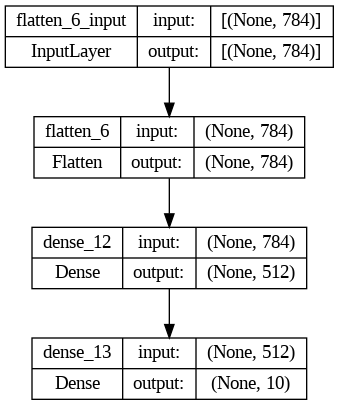

In [ ]:
keras.utils.plot_model(zalandoX[6], "zalando_arquitectura.png", show_shapes=True)


# **Fase de entrenamiento**

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


# Normalizacion
La normalizacion de los datos antes de entrenar al red ayuda a estabilizar y acelerar el proceso de entrenamiento de una red neuronal, al ayudar a converger a la funcion de optimizacion

Al normalizar los datos, se evitan problemas de **convergencia** lenta o inestabilidad numérica que pueden ocurrir si los datos tienen escalas muy diferentes. Ademas, al reducir la **variabilidad** en las escalas de las características, el modelo puede aprender relaciones más significativas entre las características y generalizar mejor a datos que no ha visto antes.

Al redimensionar las imágenes y luego normalizar los valores de píxeles en el rango [0, 1] nos aseguramos de que los datos estén en un formato adecuado y normalizado antes de entrenar el modelo. Trabajamos con datos de imágenes en escala de grises, donde los valores originales de píxeles están en el **rango** [0, 255]. No se usan datos con valores que sean mucho más grandes que los valores de los pesos de la red, o datos que sean heterogéneos de rango entre ellos para facilitarla convergencia. Cuando normalizamos los valores de píxeles **dividiendo entre 255**, todos los valores estarán en el rango [0, 1].
Ademas, tiene sentido realizar estos pasos cuando se tiene una función de activación sigmoide en la capa de salida, ya que la sigmoide produce salidas en el rango [0, 1].

En cuanto a la dimension de los datos, los convertimos de matriz 28x28 a un vector unidimensional.

**PQ NO ESTAN LOS DATOS YA EN 784 DESPUES DE USAR FLATTEN ????**

In [ ]:
# PROBABILIDAD DE COLOR (1 = negro y 0 = blanco)

train_images = x_train.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
train_images, len(train_images), train_images.shape, train_images[3000]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 60000,
 (60000, 784),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.47, 0.51, 0.36, 0.58, 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.98, 0.78, 0.67, 0.76, 0.6 , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.49, 0.76, 0.65,
        0.94, 1.  , 0.85, 0.67, 0.89, 0.49, 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.65, 0.61, 0.62, 0.67, 0.7 , 0.83, 0.84, 0.82, 0.77, 0.74, 0.62, 0.64, 0.62, 0.42, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0

In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Preparar etiquetas - One hot encoding
Codificamos categoricamente las etiquetas. Usaremos el **one-hot encoding**, que en resumen, consiste en transformar las etiquetas en un vector de tantos ceros como el número de etiquetas tenga, con el valor de 1 en el índice que le corresponde al valor de la etiqueta.

Es decir, si antes teniamos una prenda de ropa cuya etiqueta decia que pertenecia a la clase 3, ahora su etiqueta sera un vector donde aparezca un 1 en la posicion de la clase 3, y ceros en las demas posiciones.

La funcion to_categorical conveirte los datos en formato one hot encoding

In [ ]:
# 6.- PREPARACIÓN LAS ETIQUETAS

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
train_labels[30000] # Posición 0 a 9 donde solo la 3 tiene probabilidad 1.
train_images.shape

(60000, 784)

#**Entrenamiento**

Teniendo en cuenta los conceptos que se explicaran a continuacion, se entrena los 8 modelos que se han creado y guardado en ZalandoX. En cada iteración, la red computará los gradientes de los pesos en relación con la pérdida en el lote y ajustará los pesos en consecuencia.


#Pesos sinapticos
En el entrenamiento, los pesos sinapticos (transmision de neurotransmisores) se iran ajustando para conseguir una mejor prediccion que reduzca el error. Un peso muy alto o muy bajo no significa que sea mejor; depende de cada problema. Es importante que el valor de estos pesos se encuentre en un rango  que sea **generalista** para que el modelo conteste bien, no solo con los datos de entrenamiento, sino tambien con los que nunca haya visto.

En la **matriz de pesos**, cada columna representara las neuronas de entrada y cada fila las de salida. Estos seran los valores que se vayan modificando, no los de la funcion.


# Epocas
Para entrenar el modelo, definimos el número de epocas como 5, es decir, que el algoritmo recorrera todo el conjunto de datos de entrenamiento 5 veces completas durante dicho proceso. En cada unade las epocas, el algoritmo vera todas las imagenes de entrenamiento una vez. Esto es importante porque durante cada epoca, la red neuronal ajustara sus pesos en funcion de como se ajustan las predicciones a las etiquetas reales en el conjunto de datos. Con multiples epocas, la red tiene la oportunidad de mejorar sus predicciones a medida que ve los datos repetidamente. Esto permite que el modelo aprenda y mejore su rendimiento.

# Sobreentrenamiento
Sin embargo, aunque el numero de epocas ayuda a mejorar el rendimiento, si es muy alto tambien puede provocar sobreentrenamiento. Esto consiste en que si dejamos que el algoritmo de mucha vueltas con los mismos datos de entrenamiento, entonces pierde la generalidad y solo acierta bien esos datos.

# Tamaño de lote (batch size)
El tamaño de lote es otra forma de evitar el sobreentrenamiento. En esta red, creamos paquetes de 128 imagenes para no actualizar el error imagen a imagen sino de varias en varias. Esto es beneficioso en terminos de eficiencia computacional y sobreentrenamiento.

# Numero de veces que esta red actualiza el numero de parametros
60 000 / 128 = 468,75 que se aproxima a 469 veces
469*5 = 2345

Si tengo 60 000 imagenes que se actualizan / evaluan en paquetes de 128, lo divido para ver cuantos paquetes hay. Ademas, como hay 5 epocas, cada paquete se va a evaluar 5 veces.

In [ ]:
history = [0]*cantidadModelos
for i in range(0,cantidadModelos):
  print("----------------Modelo",i+1,"--------------------------------------------------------")
  history[i] = zalandoX[i].fit(train_images, train_labels, epochs=5, batch_size=128)
  plot_acc(history[i])


----------------Modelo 1 --------------------------------------------------------
Epoch 1/5
469/469 [==============================] - 10s 5ms/step - loss: 1.6891 - accuracy: 0.3861
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 1.2004 - accuracy: 0.5891
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 1.0038 - accuracy: 0.6691
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.8661 - accuracy: 0.7174
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.7132 - accuracy: 0.7598
----------------Modelo 2 --------------------------------------------------------
Epoch 1/5
469/469 [==============================] - 3s 3ms/step - loss: 1.0827 - accuracy: 0.6468
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5551 - accuracy: 0.8158
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4897 - accuracy: 0.8323
Epoch 4/5
469/469 [========================

Al entrenarlo obtendremos dos valores: el de perdida (loss) y el de precision (accuracy). La **precision** es el porcentaje / proporcion de aciertos. La **perdida** mide como de bien se ajustan las predicciones de la red a las etiquetas verdaderas. Cuanto menor sea la pérdida, mejor será el rendimiento del modelo. El **objetivo** del entrenamiento de la red es minimizar la pérdida.
Obtendremos estos dos valores en cada epoca.

A continuación, analizaremos los valores de pérdida y precisión del **modelo 5**. En la primera época, el valor inicial de la pérdida era aproximadamente 0.9877. Sin embargo, a medida que se actualizan los pesos en cada iteración, la pérdida mejora y disminuye hasta alcanzar 0.5065. Al mismo tiempo, a medida que la pérdida disminuye, la precisión también mejora, aumentando de 0.7017 a 0.8304.

# **Verificacion**

Verificamos si nuestro modelo funciona correctamente para datos que no ha visto nunca (las 10k imagenes de prueba). En este paso, el modelo no te devuelve la prediccion de la clase a la que pertenece la imagen, sino la perdida y precision para poder evaluar el rendimineto global del modelo. Para obtener detalles sobre las predicciones individuales de cada imagen, habria que hacerlo por separado.

Aqui podremos ver si hay sobreentrenamiento, pues si la precision de las imagenes de entrenamiento es mayor que la precision de las imagenes de prueba, entonces habria sobreentrenamiento. En este modelo, hay algun caso en el que la precision es ligeramente mayor o ligeramente menor, pero la mayoria son valores muy similares, por lo que podriamos concluir que no hay sobreentrenamiento.

In [ ]:
  # 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_loss = [0]*cantidadModelos
test_acc = [0]*cantidadModelos
for i in range(0,cantidadModelos):
    print("Verificacion...Modelo",i+1,".........................................................")
    test_loss[i], test_acc[i] = zalandoX[i].evaluate(test_images, test_labels)

Verificacion...Modelo 1 .........................................................
313/313 [==============================] - 1s 3ms/step - loss: 0.6779 - accuracy: 0.7679
Verificacion...Modelo 2 .........................................................
313/313 [==============================] - 1s 3ms/step - loss: 0.4809 - accuracy: 0.8319
Verificacion...Modelo 3 .........................................................
313/313 [==============================] - 1s 2ms/step - loss: 1.2628 - accuracy: 0.6579
Verificacion...Modelo 4 .........................................................
313/313 [==============================] - 1s 4ms/step - loss: 0.5100 - accuracy: 0.8314
Verificacion...Modelo 5 .........................................................
313/313 [==============================] - 1s 3ms/step - loss: 0.5317 - accuracy: 0.8186
Verificacion...Modelo 6 .........................................................
313/313 [==============================] - 1s 3ms/step - loss: 

Esta evaluación permite la realización de una comparación entre diversos modelos. De los ocho modelos objeto de análisis, destaca la eficacia de los Modelos 6 y 8, que exhiben niveles de precisión en torno al 0.85 en términos de exactitud. Inmediatamente por debajo, en el umbral del 0.82, se encuentran los Modelos 2, 4 y 5, los cuales presentan un rendimiento ligeramente inferior.

En contraposición, los Modelos 1 y 7 manifiestan un desempeño notablemente inferior, evidenciando valores de precisión comprendidos entre 0.7 y 0.8, mientras que el Modelo 3 ostenta el rendimiento más modesto, con una precisión inferior al 0.7.

En última instancia, es importante notar que ninguno de los modelos alcanza la eficacia necesaria para considerarse un predictor sólido de prendas, ya que se esperaría una precisión cercana a 1 para tal clasificación. Esto indica la necesidad de continuar mejorando estos modelos para lograr resultados más precisos en la predicción de prendas.

**PARA ESTO NO HE USADO LOS DE 25 EPOCAS**

# **GENERACIÓN DE PREDICCIONES**
1. Verificamos y evaluamos la calidad de las predicciones para la imgen 6
2. Realizar predicciones sobre la imagen 6º imagen de test con los 8 modelos
3. Realizar predicciones sobre todas las iamgenes de todos los tipos de etiquetas con los 8 modelos

En el siguiente código se realizarán predicciones en un conjunto de imágenes de prueba (`test_images`) mediante un bucle que itera sobre varios modelos.  En cada iteración, se imprime información sobre las predicciones realizadas por el modelo correspondiente. El enfoque se centra particularmente en el sexto elemento de las predicciones, con la expectativa de que este elemento debería ser clasificado como 1 (Trouser).

La función `np.argmax(prediciones[5])` se utiliza para encontrar el índice de la predicción con el valor máximo para el sexto elemento. Además, se imprime la suma de todas las predicciones para este mismo elemento y así verificamso que es 1 (el conjunto de probabilidades suma el 100%). Estos pasos pueden considerarse como medidas de verificación y evaluación de la calidad de las predicciones. Finalmente, se imprime el conjunto completo de predicciones para el conjunto de imágenes de prueba, lo que proporciona una visión general de las salidas del modelo.


In [ ]:


# Hacemos las predicciones con las imágenes de Test
for i in range(0,cantidadModelos):
    print("Verificacion...Modelo",i+1,".........................................................")
    prediciones = zalandoX[i].predict(test_images)

    print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
    print(prediciones[5])
    print("=======================================================================")
    print("=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============")
    print(np.argmax(prediciones[5]))
    print("=======================================================================")
    print("=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===")
    print(np.sum(prediciones[5]))
    print("=======================================================================")
    print("=PINTAMOS TODAS LAS PREDICCIONES=======================================")
    print(prediciones)

Verificacion...Modelo 1 .........................................................
313/313 [==============================] - 1s 1ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.01 0.97 0.   0.01 0.   0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
1
=LA SUMA DE TODAS LAS PREDICCIONES PARA EL ELEMENTO 6 DEBERÍA SER 1===
0.99999994
=PINTAMOS TODAS LAS PREDICCIONES=======================================
[[0.   0.   0.   ... 0.3  0.04 0.5 ]
 [0.   0.   0.62 ... 0.   0.   0.  ]
 [0.   1.   0.   ... 0.   0.   0.  ]
 ...
 [0.11 0.   0.01 ... 0.01 0.42 0.14]
 [0.   0.87 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.45 0.08 0.13]]
Verificacion...Modelo 2 .........................................................
313/313 [==============================] - 1s 2ms/step
=VEMOS LA PREDICCIÓN DEL ELEMENTO 6 (QUE DEBERÍA SER UN 1)============
[0.01 0.96 0.   0.02 0.01 0.   0.   0.   0.   0.  ]
=VEMOS LA PREDICCIÓN DEL 

Esta función se utiliza para mostrar una imagen junto con información sobre la predicción del modelo y la etiqueta verdadera, y colorea la etiqueta del eje X según si la predicción fue correcta o no.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  #La función ('inshow') de Matplotlib permite mostrar imagenes, en este caso en
  # escala de grises, ya que el mapa de color ('cmap') es ('plt.cm.binary'),
  # donde 0 es negro y 1 es blaco, utilizando así que las imagenes están en forma
  # de porcentajes.
  plt.imshow(img, cmap=plt.cm.binary)

  # La función ('argmax') de Numpy, devuelve el indice del valor máximo en el array
  # , lo que significa que ('predicted_label') ahora contiene la etiqueta predicha.
  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  # La siguinte función de Matplotlib establece la etiqueta del eje X de la imagen,
  # la etiqueta consta de tres numeros:
  # 1 - Mustra la opción de la etiqueta de la imagen predicha por el modelo
  # 2 - Muestra en porcentaje de acierto de la imagen
  # 3 - Muestra el numero de la etiqueta correcta
  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

Esta función crea un gráfico de barras que representa las predicciones de un modelo para una muestra específica. Colorea la barra predicha en rojo y la barra correspondiente a la etiqueta verdadera en negro, lo que facilita la visualización de la calidad de las predicciones del modelo.

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])

  # La siguiente función de la biblioteca 'matplotlib' crea un gráfico de barras
  # con 10 barras (nº de etiquetas), donde las alturas estan dadas por los
  # los valores ('predictions_array'), siendo todas de color verde, menos
  # el valor de la etiqueta, que en caso de coincidir con el valro de la prediccion
  # es negra, y en caso contrario, la barra de la etiqueta sera negra y la
  # predicción roja
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

Realizacion de la predicción para la imagen 6 (es decir, posición 5 de los arrays que guardan tanto las imagenes como las etiquetas) por los 8 modelos.

Verificacion...Modelo 1 .........................................................
313/313 [==============================] - 1s 2ms/step


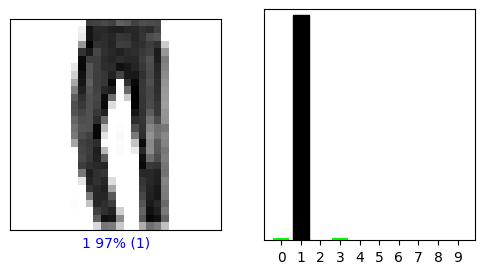

Verificacion...Modelo 2 .........................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

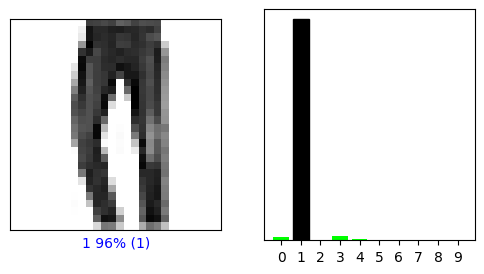

Verificacion...Modelo 3 .........................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

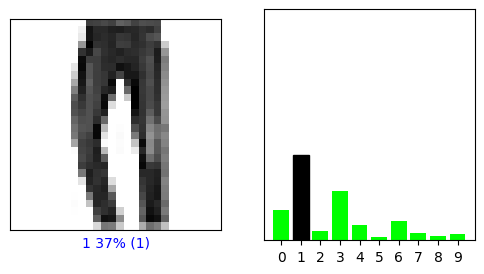

Verificacion...Modelo 4 .........................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

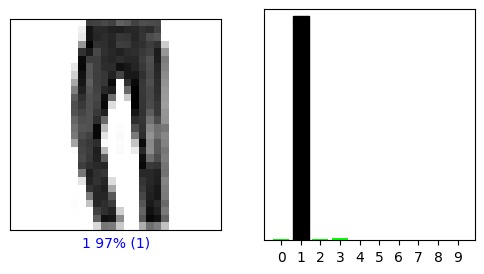

Verificacion...Modelo 5 .........................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

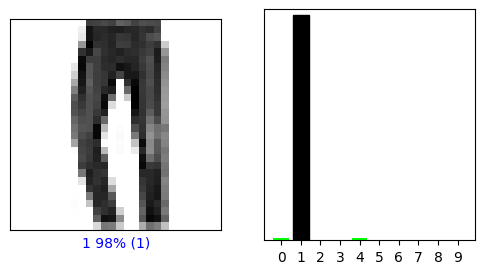

Verificacion...Modelo 6 .........................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

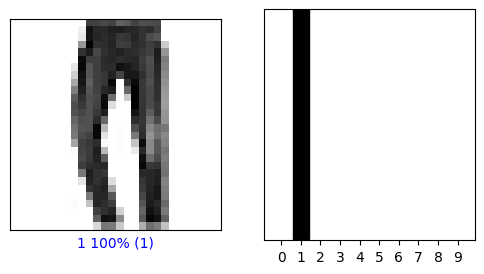

Verificacion...Modelo 7 .........................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

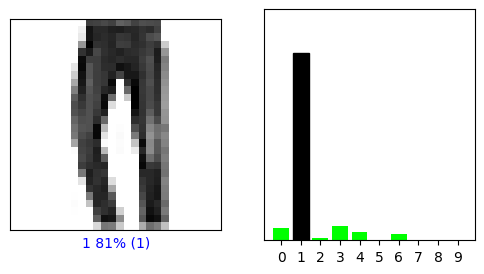

Verificacion...Modelo 8 .........................................................
313/313 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

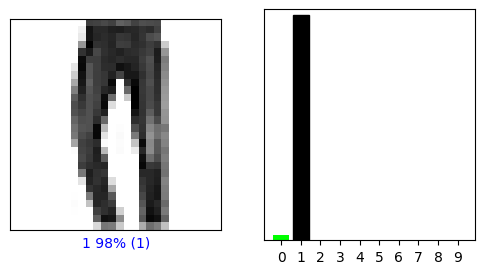

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(0,cantidadModelos):
    print("Verificacion...Modelo",i+1,".........................................................")
    prediciones = zalandoX[i].predict(test_images)

    j = 5
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(j, prediciones[j], y_test, test_images.reshape(10000,28,28))
    plt.subplot(1,2,2)
    plot_value_array(j, prediciones[j],  y_test)
    plt.show()
    plt.clf()

Una vez visualizado los datos y las gráficas, podemos observar la calidad de los modelos para la predicción de la sexta imagen.

Los modelos que utilizan el **optimizador** ('rmsprop'), en generla suelen acertar más en sus predicciónes, mientras que los modelos con el optimizador ('sgd') suele tener un porcentaje mayor de fallos.

En cuanto al **número de neuronas** se puede observar que un número mayor de nueronas favorece reduce el porcentjae de fallo, (el caso 3 y el 7, similares donde la unica diferencia es el nuemro de neuronas en la capa oculta, podemos observar que el porcentaje de fallo se reduce hasta un 40% ).

Por último, las conlcusiones en cuanto a **la función de activación**, podmeos observar que la función ('relu') es significativamente mejor que la función ('sigmoid') para este problema.



# **Hiperparámetros**:


**Nºneuronas**: número de neuronas de la capa oculta depende de la complejidad del problema.


1.   10:
2.   512:

**Función de activación**:



1.   Relu: se utiliza por su eficiencia de computo (rango de salida (0 = nº negativos y +0 < para valores positivos)). Puede tener problemas como el 'dying ReLU'neuronas que simopre devuelven 0.
2.   Sigmoid: se suele utilizar en redes donde la clasificación es binaria (rango de salida [0,1]). Suele tener problemas con el desvanecimiento del gradiente en este tipo de problemas.

**Optimizador**:



1.   Sgd: calcula el gradiente de la función de pérdida con respecto a los parámetros (pesos) para un pequeño subconjunto de datos de entrenamiento (lote) en cada iteración. Actualiza los pesos en la dirección opuesta al gradiente multiplicado por una tasa de aprendizaje.

>* Adaptación de la Tasa de Aprendizaje:  constante que se debe ajustar manualmente
> *   Manejo de Variaciones en la Escala de los Gradientes: sensible a las variaciones en la escala de gradiente
> *   Curvas de Aprendizaje: converge lentamente en curvas de pérdidas complejas


2.   RMSprop:

>* Adaptación de la Tasa de Aprendizaje: Ajusta automáticamente la tasa de aprendizaje según la información acumulada sobre los gradientes anteriores.
> *   Manejo de Variaciones en la Escala de los Gradientes: Escala los gradientes antes de actualizar los pesos
> *   Curvas de Aprendizaje: converge rápido y se peude adaptar a curvas de pérdidas complejas






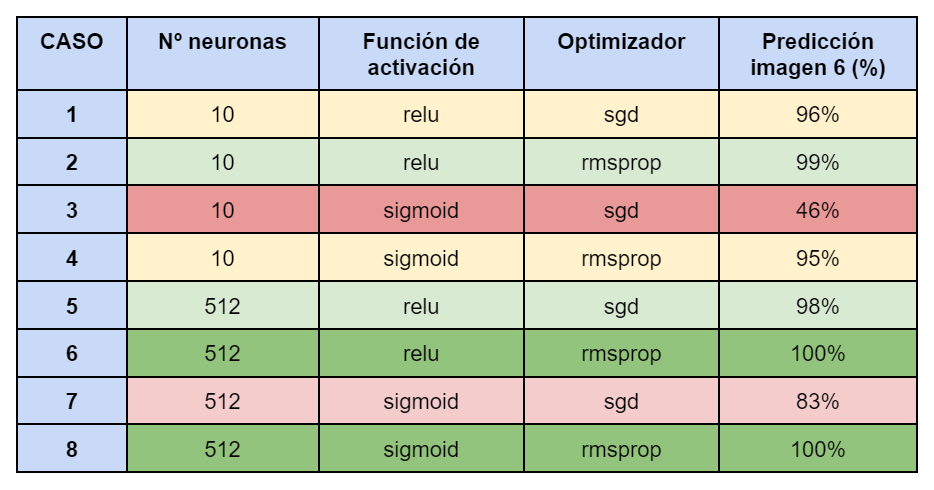

Probar para todas las imgenes

............................................................................
Verificacion...Modelo 1 .........................................................
............................................................................
313/313 [==============================] - 0s 1ms/step


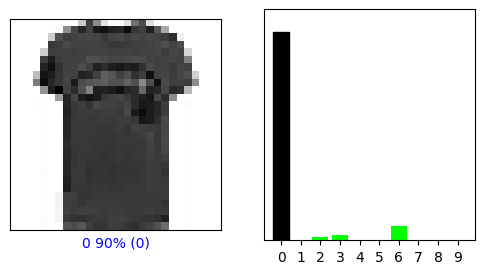

<Figure size 640x480 with 0 Axes>

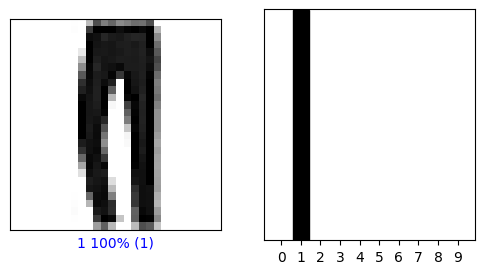

<Figure size 640x480 with 0 Axes>

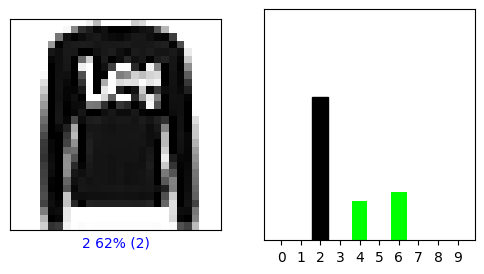

<Figure size 640x480 with 0 Axes>

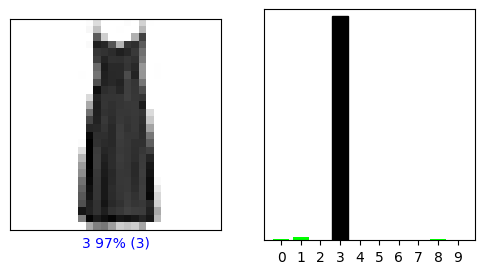

<Figure size 640x480 with 0 Axes>

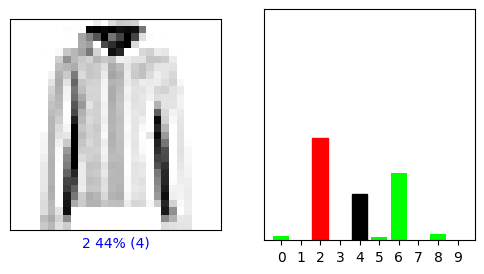

<Figure size 640x480 with 0 Axes>

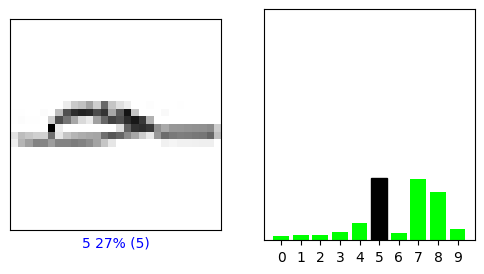

<Figure size 640x480 with 0 Axes>

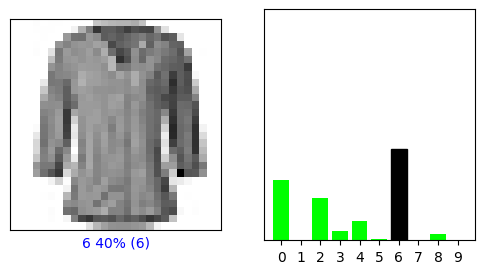

<Figure size 640x480 with 0 Axes>

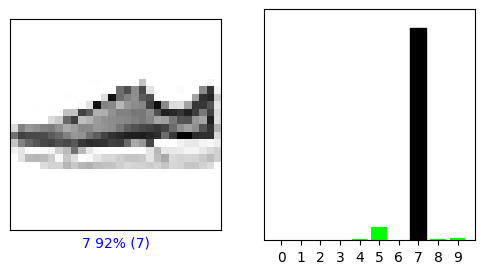

<Figure size 640x480 with 0 Axes>

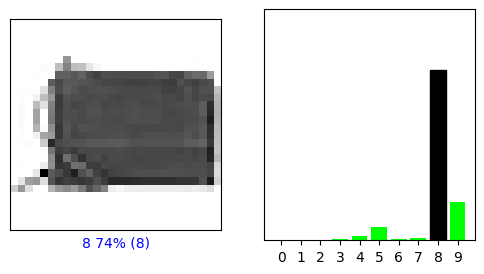

<Figure size 640x480 with 0 Axes>

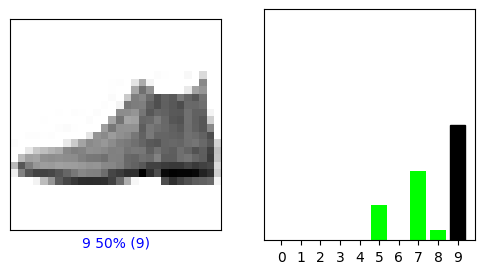

............................................................................
Verificacion...Modelo 2 .........................................................
............................................................................
313/313 [==============================] - 0s 1ms/step


<Figure size 640x480 with 0 Axes>

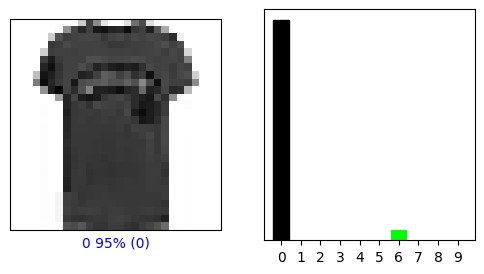

<Figure size 640x480 with 0 Axes>

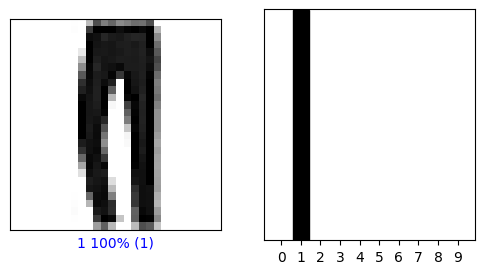

<Figure size 640x480 with 0 Axes>

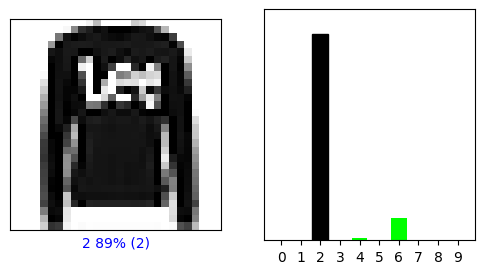

<Figure size 640x480 with 0 Axes>

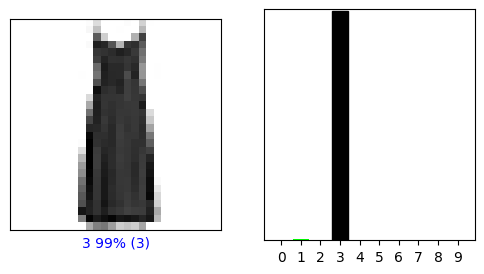

<Figure size 640x480 with 0 Axes>

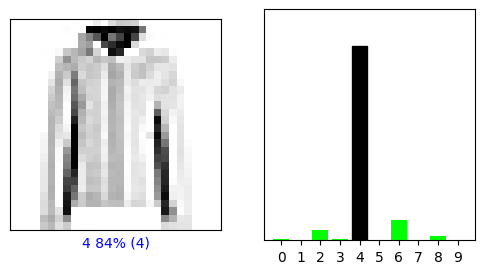

<Figure size 640x480 with 0 Axes>

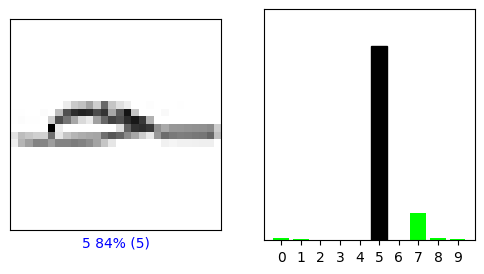

<Figure size 640x480 with 0 Axes>

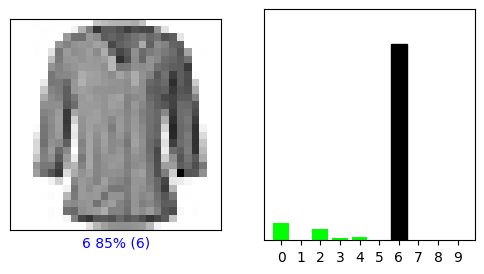

<Figure size 640x480 with 0 Axes>

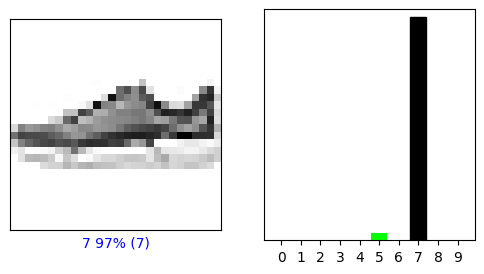

<Figure size 640x480 with 0 Axes>

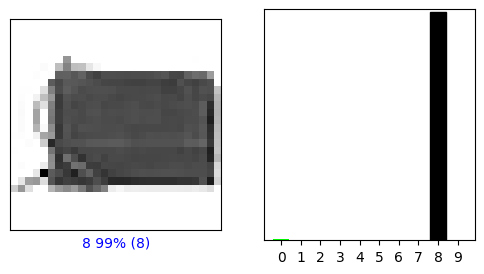

<Figure size 640x480 with 0 Axes>

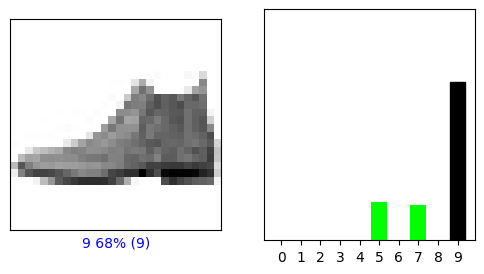

............................................................................
Verificacion...Modelo 3 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

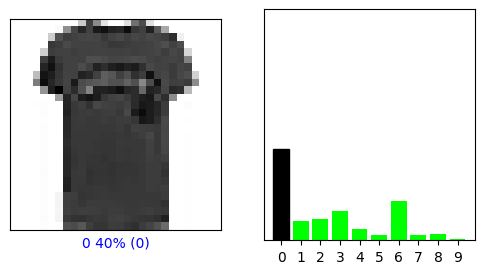

<Figure size 640x480 with 0 Axes>

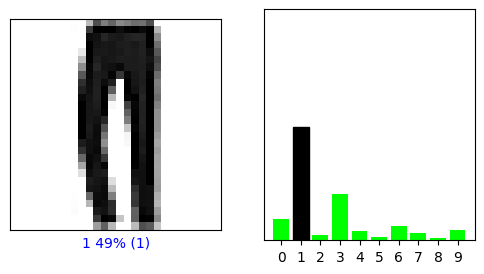

<Figure size 640x480 with 0 Axes>

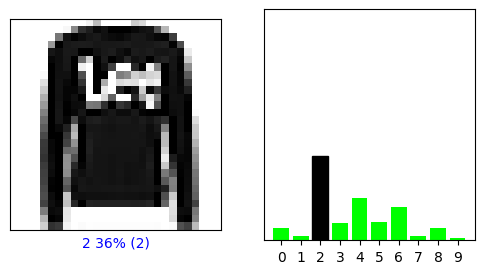

<Figure size 640x480 with 0 Axes>

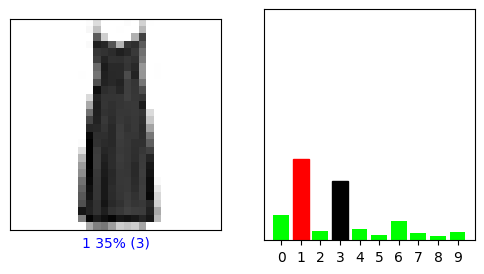

<Figure size 640x480 with 0 Axes>

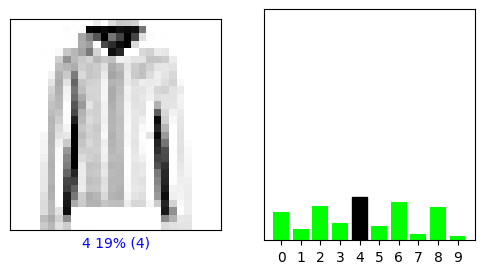

<Figure size 640x480 with 0 Axes>

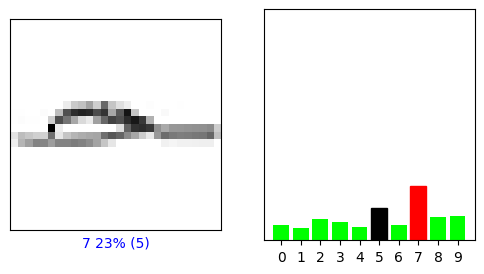

<Figure size 640x480 with 0 Axes>

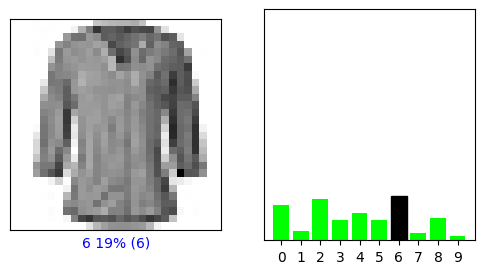

<Figure size 640x480 with 0 Axes>

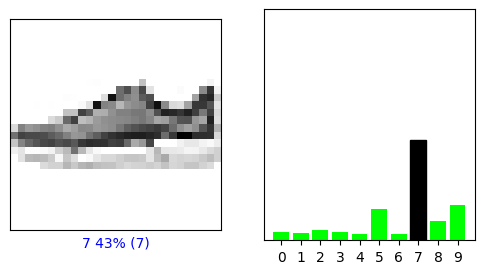

<Figure size 640x480 with 0 Axes>

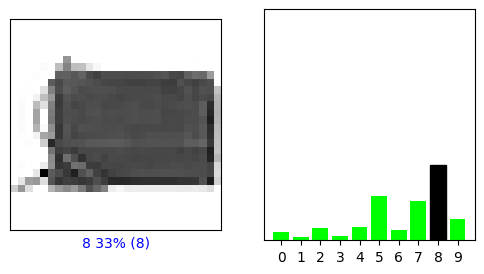

<Figure size 640x480 with 0 Axes>

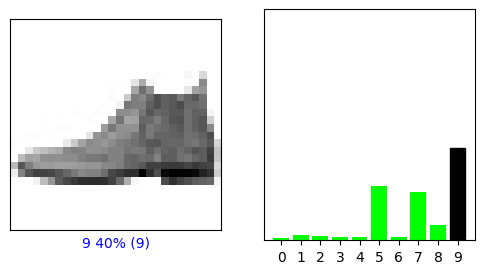

............................................................................
Verificacion...Modelo 4 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

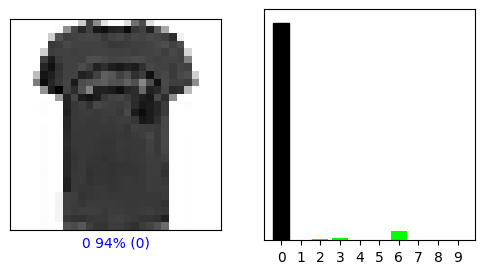

<Figure size 640x480 with 0 Axes>

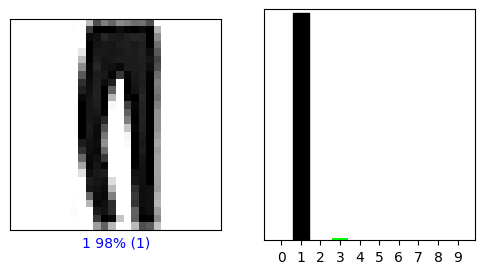

<Figure size 640x480 with 0 Axes>

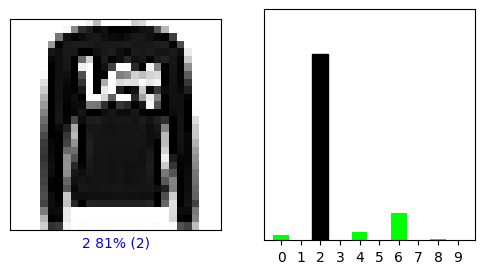

<Figure size 640x480 with 0 Axes>

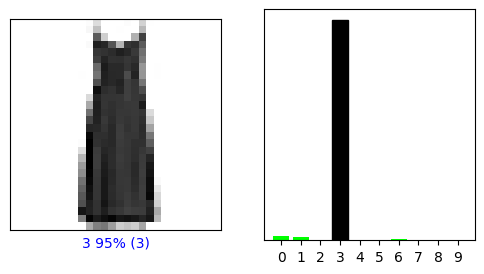

<Figure size 640x480 with 0 Axes>

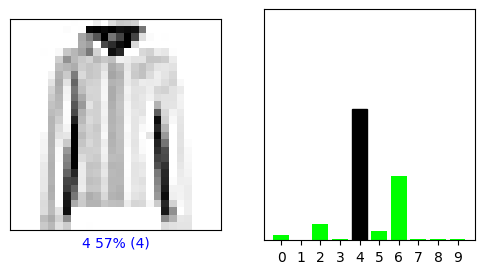

<Figure size 640x480 with 0 Axes>

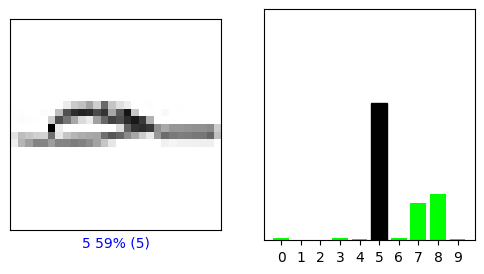

<Figure size 640x480 with 0 Axes>

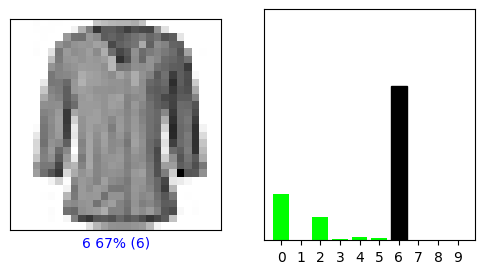

<Figure size 640x480 with 0 Axes>

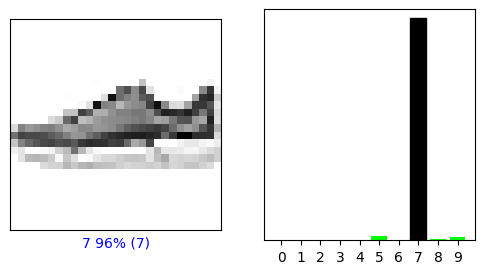

<Figure size 640x480 with 0 Axes>

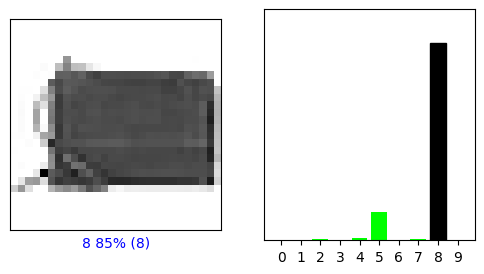

<Figure size 640x480 with 0 Axes>

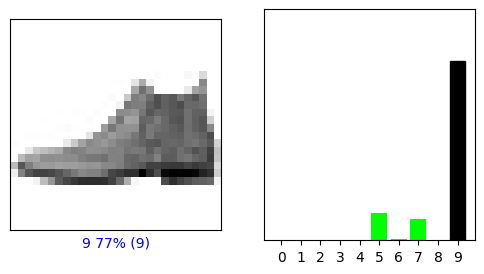

............................................................................
Verificacion...Modelo 5 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

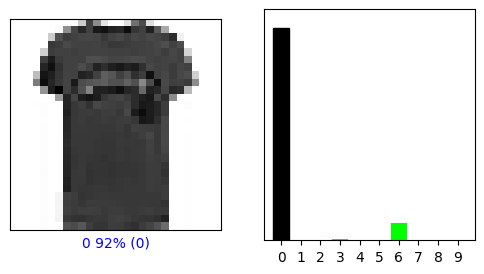

<Figure size 640x480 with 0 Axes>

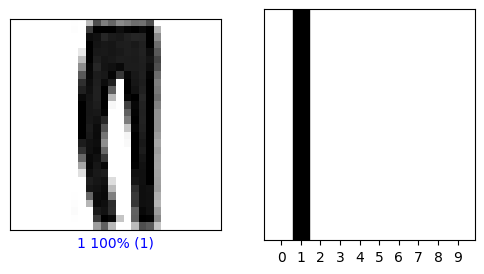

<Figure size 640x480 with 0 Axes>

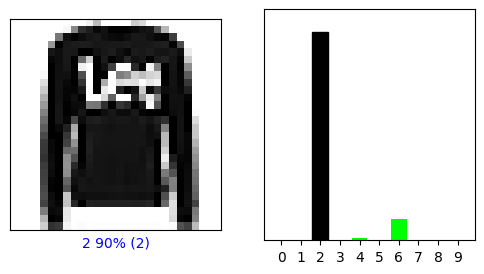

<Figure size 640x480 with 0 Axes>

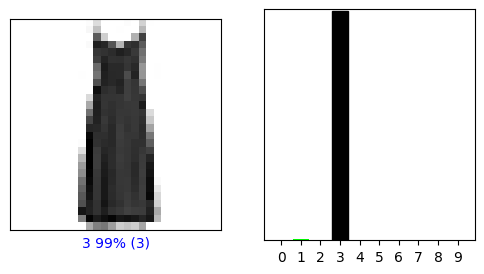

<Figure size 640x480 with 0 Axes>

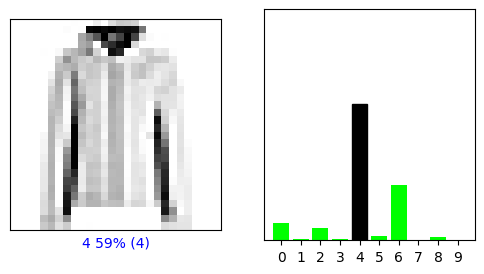

<Figure size 640x480 with 0 Axes>

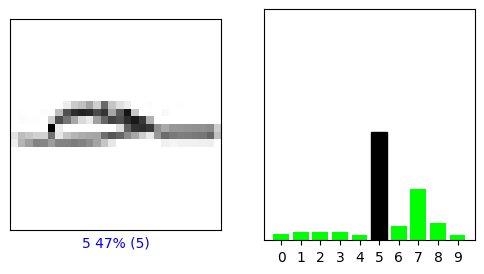

<Figure size 640x480 with 0 Axes>

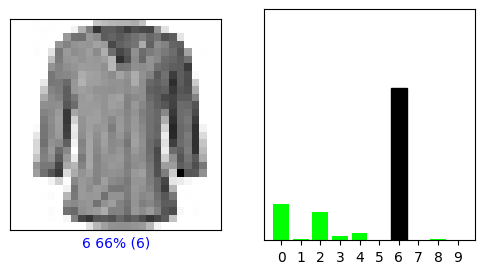

<Figure size 640x480 with 0 Axes>

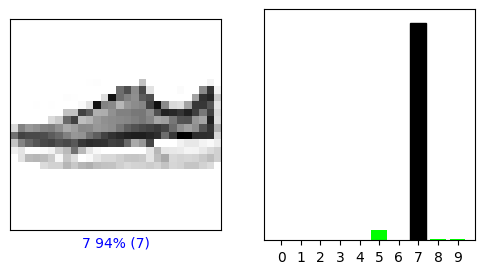

<Figure size 640x480 with 0 Axes>

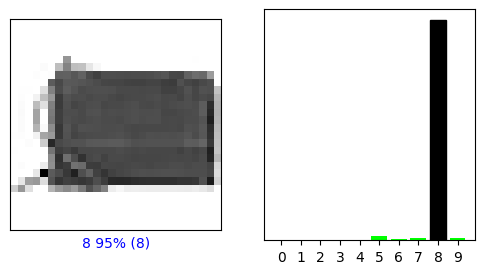

<Figure size 640x480 with 0 Axes>

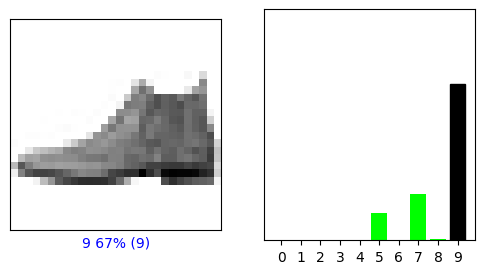

............................................................................
Verificacion...Modelo 6 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

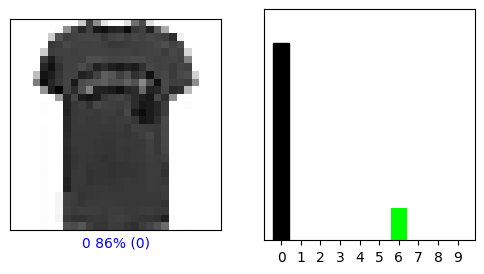

<Figure size 640x480 with 0 Axes>

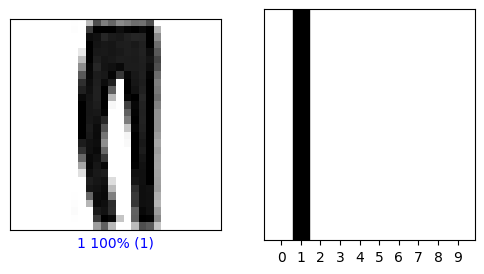

<Figure size 640x480 with 0 Axes>

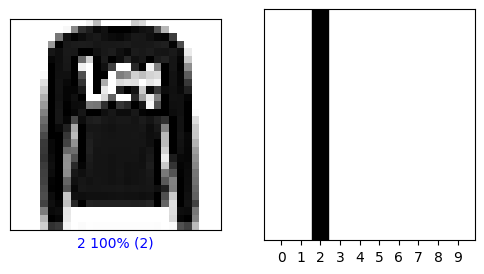

<Figure size 640x480 with 0 Axes>

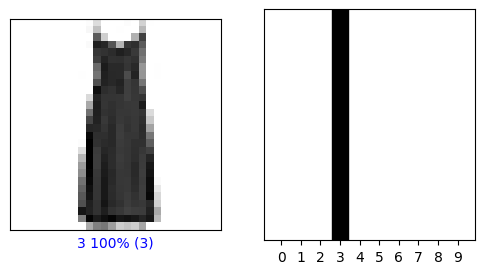

<Figure size 640x480 with 0 Axes>

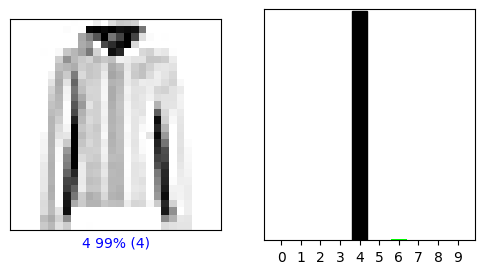

<Figure size 640x480 with 0 Axes>

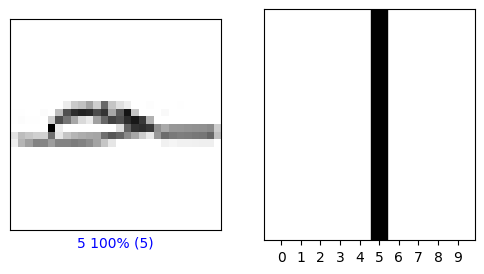

<Figure size 640x480 with 0 Axes>

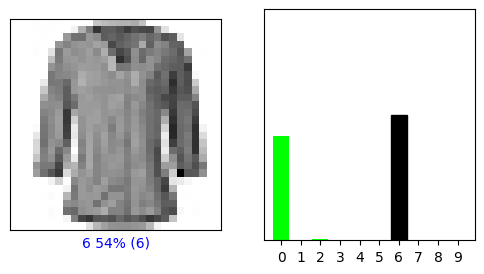

<Figure size 640x480 with 0 Axes>

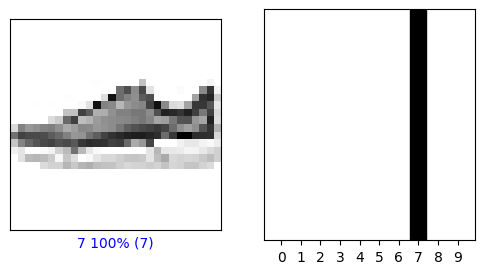

<Figure size 640x480 with 0 Axes>

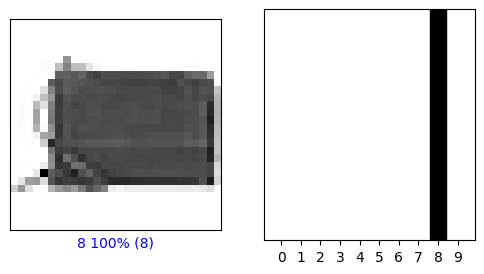

<Figure size 640x480 with 0 Axes>

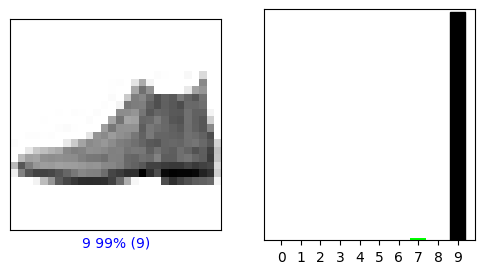

............................................................................
Verificacion...Modelo 7 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

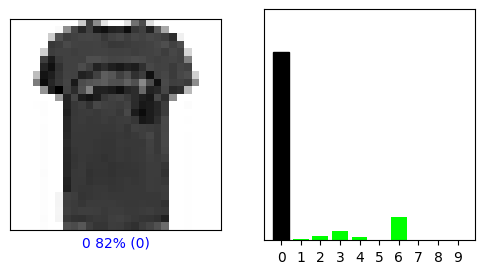

<Figure size 640x480 with 0 Axes>

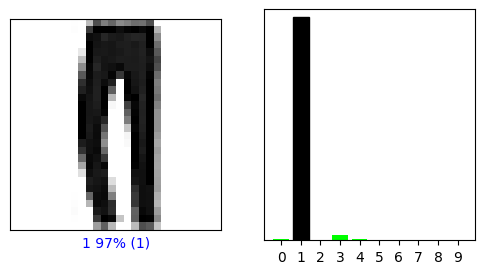

<Figure size 640x480 with 0 Axes>

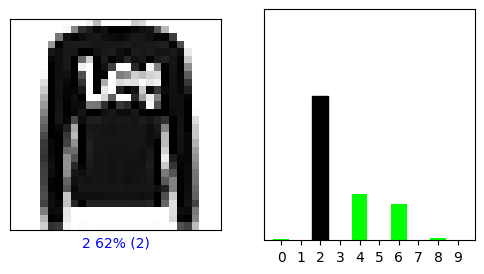

<Figure size 640x480 with 0 Axes>

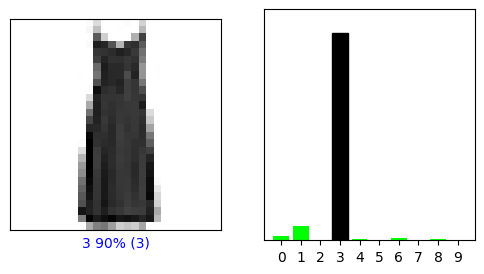

<Figure size 640x480 with 0 Axes>

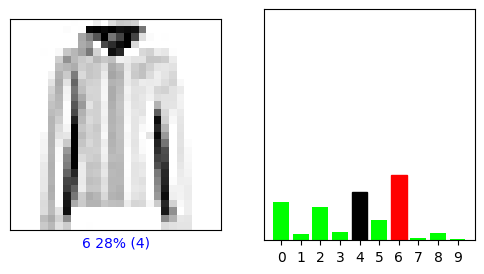

<Figure size 640x480 with 0 Axes>

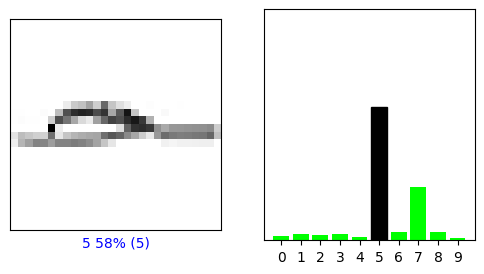

<Figure size 640x480 with 0 Axes>

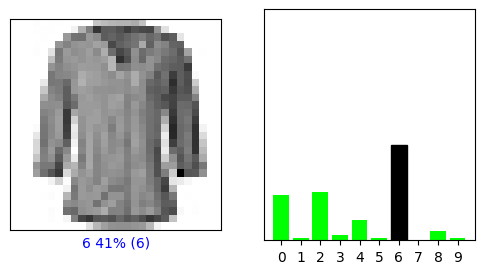

<Figure size 640x480 with 0 Axes>

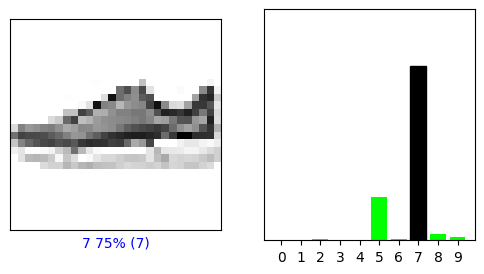

<Figure size 640x480 with 0 Axes>

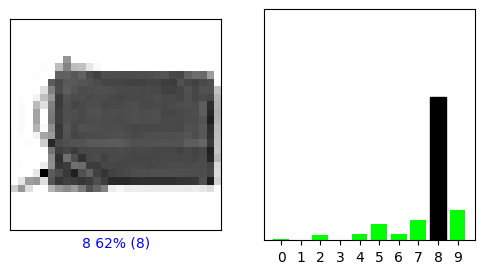

<Figure size 640x480 with 0 Axes>

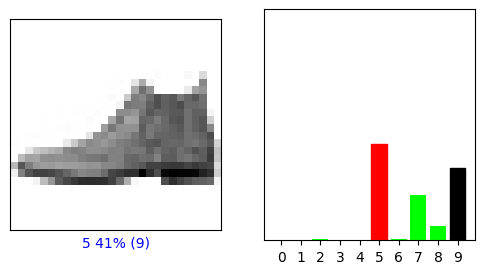

............................................................................
Verificacion...Modelo 8 .........................................................
............................................................................
313/313 [==============================] - 1s 2ms/step


<Figure size 640x480 with 0 Axes>

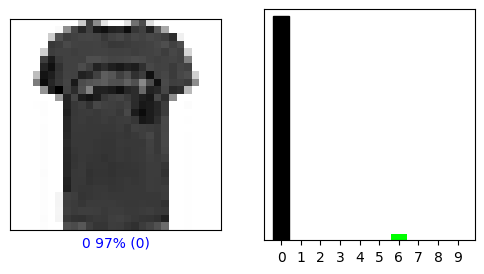

<Figure size 640x480 with 0 Axes>

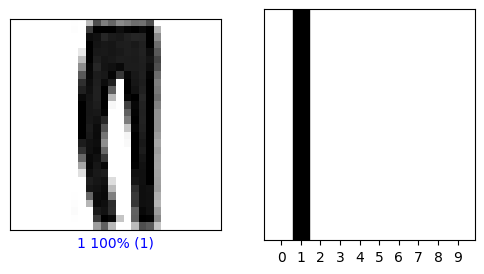

<Figure size 640x480 with 0 Axes>

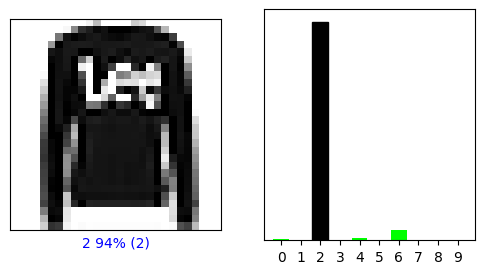

<Figure size 640x480 with 0 Axes>

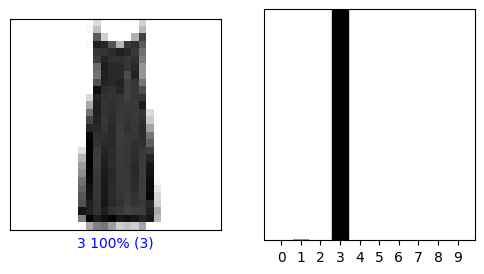

<Figure size 640x480 with 0 Axes>

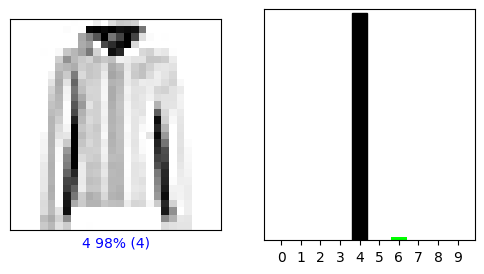

<Figure size 640x480 with 0 Axes>

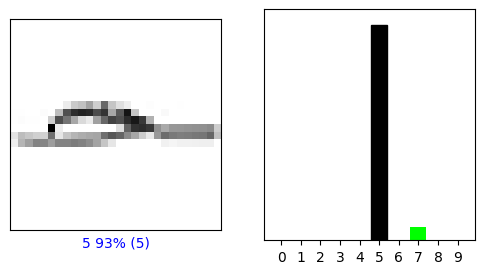

<Figure size 640x480 with 0 Axes>

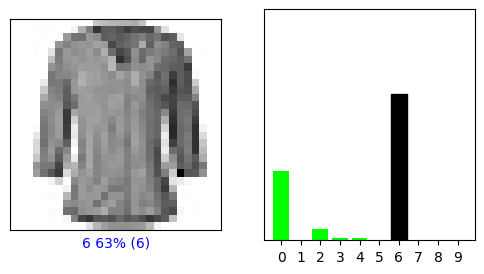

<Figure size 640x480 with 0 Axes>

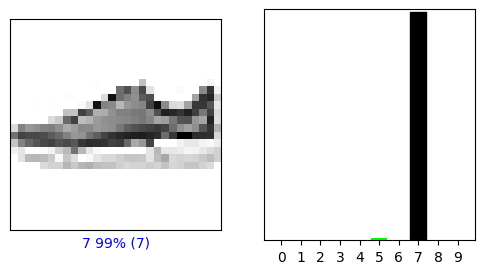

<Figure size 640x480 with 0 Axes>

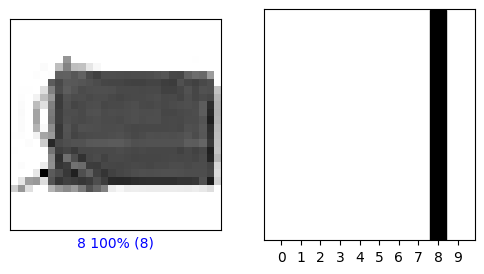

<Figure size 640x480 with 0 Axes>

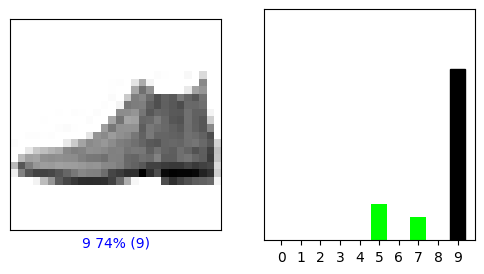

<Figure size 640x480 with 0 Axes>

In [ ]:


#identificar las posiciones de los 10 tipos de etiqueta
tiposPrendas = [0]*10
for i in range(0,10):
  tiposPrendas[i] = np.where(y_test == i)[0][0]


for i in range(0,cantidadModelos):
    print("............................................................................")
    print("Verificacion...Modelo",i+1,".........................................................")
    print("............................................................................")

    prediciones = zalandoX[i].predict(test_images)

    for j in tiposPrendas:
        plt.figure(figsize=(6,3))
        plt.subplot(1,2,1)
        plot_image(j, prediciones[j], y_test, test_images.reshape(10000,28,28))
        plt.subplot(1,2,2)
        plot_value_array(j, prediciones[j],  y_test)
        plt.show()
        plt.clf()

# **Analisis modelos 2 y 7**
Ahora aumentaremos en los modelos 2 y 7 las epocas para que en vez de recorrer los datos 5 veces, lo haga 25. Dado que estos modelos ya han captado el conocimiento de las primeras 5 épocas, simplemente les proporcionaremos 20 épocas adicionales para continuar mejorando su rendimiento.

In [ ]:
epocas = 20
print("----------------Modelo",2,"--------------------------------------------------------")
zalandoX[1].fit(train_images, train_labels, epochs=epocas, batch_size=128)
print("----------------Modelo",7,"--------------------------------------------------------")
zalandoX[6].fit(train_images, train_labels, epochs=epocas, batch_size=128)

----------------Modelo 2 --------------------------------------------------------
Epoch 1/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.8500
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4238 - accuracy: 0.8515
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8536
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4123 - accuracy: 0.8552
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8568
Epoch 6/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4044 - accuracy: 0.8593
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4014 - accuracy: 0.8588
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8618
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.3922 - accuracy: 0.8619
Epoch 10/20
469/46

In [ ]:
# EVALUAMOS LOS NUEVOS MODELOS
zalandoX[1].evaluate(test_images, test_labels)
zalandoX[6].evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4910 - accuracy: 0.8255


[0.4909571409225464, 0.8255000114440918]

Observamos que la implementación de 20 épocas adicionales afecta de manera distinta a ambos modelos. Aunque ambos experimentan un incremento en sus índices de eficacia, este aumento no es uniforme.

El Modelo 2 mejora de 0.82 a 0.84, lo cual representa un avance relativamente pequeño en relación al número de épocas adicionales. Su tasa de aciertos en las imágenes de entrenamiento es del 0.87, lo que sugiere que el modelo está comenzando a mostrar signos de sobreentrenamiento y ya no puede aprender más de las imágenes proporcionadas.

Por otro lado, el Modelo 7 muestra un aumento más significativo, pasando de 0.74 a 0.81. Su tasa de aciertos en los datos de entrenamiento se sitúa en 0.82, lo que se acerca mucho a la eficacia en la evaluación. Esto sugiere que el Modelo 7 podria aún no haber alcanzado el punto de sobreentrenamiento y podría seguir aprendiendo de las imágenes proporcionadas.

# **Mejora del Modelo**
**Adam** (Adaptive Moment Estimation) es un **algoritmo de optimización** que fusiona las virtudes de los algoritmos Momentum (SGD con Momentum) y RMSprop, dando lugar a una mejora en el proceso de aprendizaje del modelo. En sintonía con Momentum, incorpora el uso de una **media móvil** para atenuar las oscilaciones excesivas en los valores del gradiente durante el proceso de entrenamiento. Paralelamente, toma prestado de RMSprop la capacidad de **adaptar de manera dinámica el tamaño del paso**, lo que permite acelerar o desacelerar el proceso de entrenamiento en función de la magnitud del gradiente en cada una de las iteraciones

Adam ha ganado una gran popularidad en el ámbito del aprendizaje profundo gracias a su capacidad para lograr una **convergencia rápida** en una amplia gama de problemas de optimización. Su fortaleza radica en su adaptabilidad para ajustar las tasas de aprendizaje de manera independiente para diferentes parámetros del modelo.

Por otro lado, **sparse_categorical_crossentropy** es una **funcion de perdida** hermanada con la funcion categorical_crossentropy. Ambas desempeñan un papel fundamental en la clasificación multiclase en el ámbito del aprendizaje profundo. Ambas funciones realizan una predicción del modelo basada en múltiples salidas para cada ejemplo, interpretándolas como las **probabilidades de pertenencia** a las distintas clases.

La distinción clave entre las dos radica en la **representación de las etiquetas**. Mientras que categorical_crossentropy espera etiquetas codificadas en **formato one-hot**, sparse_categorical_crossentropy acepta etiquetas representadas como **números enteros**. Esta diferencia es significativa, ya que sparse_categorical_crossentropy demanda considerablemente menos carga computacional al utilizar un número entero en lugar de un vector en formato one-hot. Por esta razón, sparse_categorical_crossentropy se convierte en la elección preferida en problemas de clasificación con un **elevado número de clases**, contribuyendo a una **eficiencia computacional** notable.

In [ ]:
# SE CAMBIAN EL OPTIMIZADOR A 'Adam' Y LA FUNCIÓN PERDIDA A 'sparse_categorical_crossentropy'
zalandoX[2].compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam', metrics=['accuracy'])

In [ ]:
# ENTRENAMOS EL NUEVO MODELO
print("Mejora...Modelo",3,".........................................................")
zalandoX[2].fit(train_images, y_train, epochs=5, batch_size=128)

Mejora...Modelo 3 .........................................................
Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.9419 - accuracy: 0.7473
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6732 - accuracy: 0.8085
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5608 - accuracy: 0.8284
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.5039 - accuracy: 0.8382
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4706 - accuracy: 0.8445


In [ ]:
# EVALUAMOS EL NUEVO MODELO
print("Evaluacion...Modelo",3,".........................................................")
zalandoX[2].evaluate(test_images, y_test)

Evaluacion...Modelo 3 .........................................................
313/313 [==============================] - 1s 2ms/step - loss: 0.4890 - accuracy: 0.8348


[0.48899945616722107, 0.8348000049591064]

Después de haber sometido a un nuevo proceso de entrenamiento y posterior evaluación, el modelo 3 ha sido reevaluado empleando 5 épocas de entrenamiento con el optimizador Adam y la función de pérdida sparse_categorical_crossentropy, en lugar de sus originales sigmoid y sgd. Este enfoque permite llevar a cabo un análisis comparativo en relación con su version original, con el fin de profundizar en la comprensión de los resultados obtenidos en este modelo recientemente evaluado.

La función de pérdida sparse_categorical_crossentropy, en comparación con su contraparte categorical_crossentropy, no modifica los resultados de predicción, pero ofrece un ahorro significativo en recursos computacionales. Esto se debe a que sparse_categorical_crossentropy utiliza un 10% de la memoria requerida por categorical_crossentropy al almacenar las categorías para cada elemento en el conjunto de datos.

Por otra parte, es importante destacar que el optimizador Adam sí genera cambios notables en la predicción. A pesar de que Adam incorpora técnicas de optimización tanto del SGD (Descenso de Gradiente Estocástico) como del RMSprop, no siempre supera a estas alternativas. En general, Adam se emplea con mayor frecuencia debido a su capacidad destacada de convergencia y su habilidad para manejar conjuntos de datos voluminosos.

En nuestro escenario particular, el modelo 3 obtiene un gran aumento de eficacia en las 5 epocas. En los modelos iniciales el modelo 3 era considerablemente el peor de ellos no llegando ni siquiera a superar el 0.7 de acierto. En cambio, al aplicarle el optimizador Adam consigue llegar a una cifra superior al 0.8, siendo una mejora considerable en el modelo.

#**Preguntas???????**
* Es necesario poner muchas veces lo de from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt?
* Podemos poner el punto 3 al final de todo (para usar las 5 epocas y no las 25)


#**Por hacer**
* Explicacion de los pesos
* Explicar las cositas de Sandra